## Analyzing Global Terrorism Trends: Target Vulnerability, Attack Types, and Their Outcomes

- Apale, Jedrek Mari Gabriel G.
- Masinda, Gian Kyle G.
- Sanchez, Ronan V.
- Velasquez, Almira Zabrina Alyson Q.

link to dataset: https://www.start.umd.edu/data-tools/GTD?fbclid=IwY2xjawGsWdtleHRuA2FlbQIxMQABHelOWZ92imSyR5CNNl3hX7DyDm0RbLu7CRxasL54IcugUstkkzgQrBsLIg_aem_rWPWYEYQ7IHFXqqyMVw1ug

### Dataset Description

This dataset contains records on global terrorism incidents, including details such as attack types, locations, targets, and outcomes. It aims to provide comprehensive data for analyzing patterns and trends in terrorism across various regions and over time. The dataset likely includes key attributes such as:

- Date and location of incidents
- Attack methods (e.g., bombing, armed assault)
- Targets (e.g., civilians, infrastructure, government institutions)
- Outcomes (e.g., fatalities, injuries, damage)

##### The objective of this analysis is to:

- Identify global trends in terrorism by examining temporal and geographic patterns.

- Analyze common targets and their characteristics to understand which groups or entities are most frequently attacked.

- Determine correlations between types of attacks and their outcomes, such as the severity of casualties or economic impact.


In [1]:
#IMPORTS

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from geopy.distance import geodesic
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
file_path = 'globalterrorismdb_2021Jan-June_1222dist.xlsx'

df = pd.read_excel(file_path)

#### Exploratory Analysis

Describe your data and show what kind of initial features you are dealing with
You can point anomalies/outliers in the data. Discuss patterns or findings.

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaT,60,Egypt,10,...,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaT,92,India,6,...,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN
2,202101010006,2021,1,1,NaN,0,NaT,228,Yemen,10,...,There is doubt that this incident meets terror...,"""Civilian reportedly dies of injuries from Hou...","""UN troubled by civilian deaths in Yemen's Hud...","""Five women killed in Yemen wedding attack,"" G...",START Primary Collection,0,0,0,0,NaN
3,202101010009,2021,1,1,NaN,0,NaT,4,Afghanistan,6,...,There is doubt that this incident meets terror...,"""Afghanistan- Ghor Provincial Council Member K...","""Journalist killed on 1st day of new year in A...","""Afghanistan: 2021 Begins with Assassination o...",START Primary Collection,-9,-9,0,-9,NaN
4,202101010024,2021,1,2,NaN,0,NaT,182,Somalia,11,...,NaN,"""Jubbaland lawmaker killed in car bomb blast,""...","""Somali lawmaker killed in a sticky bomb attac...","""Al-Shabab claims killing regional MP in south...",START Primary Collection,0,0,0,0,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
4955,202106300023,2021,6,30,NaN,0,NaT,4,Afghanistan,6,...,NaN,"""Gunmen blow up power pylon in Parwan,"" Afghan...","""Provinces hit by blackout after power pylon d...",NaN,START Primary Collection,-9,-9,0,-9,NaN
4956,202106300029,2021,6,30,06/30/2021,0,NaT,138,Myanmar,5,...,NaN,"""Spring Revolution Daily News for 16-30 June 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
4957,202106300030,2021,6,30,NaN,1,2021-07-08,147,Nigeria,11,...,NaN,"""Boko Haram Releases Abducted Catholic Priest ...","""Kidnapped Maiduguri Catholic Priest regains f...","""ISWAP-Boko Haram Abduct Catholic Priest In Bo...",START Primary Collection,0,0,0,0,NaN
4958,202106300038,2021,6,30,NaN,0,NaT,45,Colombia,3,...,NaN,"""Two dead and one wounded after clashes betwee...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
4959,202107020037,2021,6,30,NaN,0,NaT,138,Myanmar,5,...,There is doubt that this incident meets terror...,"""Spring Revolution Daily News for 2-7 July 202...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
print("\nDataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (4960, 135)


In [6]:
print("\nColumn Names:")
print(df.columns.tolist())



Column Names:
['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'clai

In [7]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(51), int64(29), object(54)
memory usage: 5.1+ MB


Rows: 4,960
Columns: 135
Data Types:
1 datetime column
51 float columns
29 integer columns
54 object columns (likely categorical or text)

#### Data Preprocessing and Cleaning


Explain why the data was preprocessed that way
If you removed data, explain why removing the data was necessary

##### Handle Missing Data

We check for missing values in each column computing the percentage.

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).reset_index().rename(columns={'index': 'Column'})

missing_df

,Column,Missing Values,Percentage (%)
0,weapsubtype4_txt,4960,100.0
1,weaptype4_txt,4960,100.0
2,weaptype4,4960,100.0
3,weapsubtype4,4960,100.0
4,gsubname3,4960,100.0
...,...,...,...
130,dbsource,0,0.0
131,INT_LOG,0,0.0
132,INT_IDEO,0,0.0
133,INT_MISC,0,0.0


Several columns have 100% missing values, indicating they might not be useful for analysis, we will proceed by removing these columns.
Some columns have partial missing data, we will procede by further analyzing the columns and decide which to impute or exclude in our analysis.

In [9]:
columns_to_drop = missing_df[missing_df['Percentage (%)'] == 100]['Column'].tolist()
df_cleaned = df.drop(columns=columns_to_drop)

num_columns_dropped = len(columns_to_drop)

remaining_missing_values = df_cleaned.isnull().sum().sort_values(ascending=False)
remaining_missing_percentage = (remaining_missing_values / len(df_cleaned)) * 100

In [10]:
remaining_missing_df = pd.DataFrame({
    'Column': remaining_missing_values.index,
    'Missing Values': remaining_missing_values.values,
    'Percentage (%)': remaining_missing_percentage.values
})


print("Number of Columns Dropped:", num_columns_dropped)
print("\nRemaining Missing Values Analysis:\n")
print(remaining_missing_df)

Number of Columns Dropped: 5

Remaining Missing Values Analysis:

             Column  Missing Values  Percentage (%)
0            divert            4959       99.979839
1     kidhijcountry            4959       99.979839
2        claimmode3            4959       99.979839
3    claimmode3_txt            4959       99.979839
4    claimmode2_txt            4953       99.858871
..              ...             ...             ...
125        dbsource               0        0.000000
126         INT_LOG               0        0.000000
127        INT_IDEO               0        0.000000
128        INT_MISC               0        0.000000
129         INT_ANY               0        0.000000

[130 rows x 3 columns]


In [11]:
print("\nCleaned DataFrame Shape:", df_cleaned.shape)


Cleaned DataFrame Shape: (4960, 130)


We removed 5 columns with 100% missing values, reducing the dataset to 130 columns.

We will separate the numerical and categorical columns. For the numerical columns, we will fill the missing values with their median, and for the categorical columns, we will fill the missing values with 'Unknown'.

In [12]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')


remaining_missing_values_post = df_cleaned.isnull().sum().sum()
remaining_missing_values_post

np.int64(4864)

4864 still null. we identify columns with remaining missing values.

In [13]:

remaining_missing_cols = df_cleaned.columns[df_cleaned.isnull().sum() > 0]

remaining_missing_analysis = pd.DataFrame({
    'Column': remaining_missing_cols,
    'Missing Values': df_cleaned[remaining_missing_cols].isnull().sum().values,
    'Percentage (%)': (df_cleaned[remaining_missing_cols].isnull().sum().values / len(df_cleaned)) * 100
})

print("Remaining Missing Columns Details:")
print(remaining_missing_analysis)


Remaining Missing Columns Details:
       Column  Missing Values  Percentage (%)
0  resolution            4864       98.064516


'resolution' column has missing values so we impute the missing values with 'unknown'.

In [14]:
df_cleaned['resolution'] = df_cleaned['resolution'].fillna('Unknown')

final_missing_values = df_cleaned.isnull().sum().sum()

final_missing_values

np.int64(0)

We will analyze and count all categorical columns for unique values.

In [15]:

categorical_cols = df_cleaned.select_dtypes(include='object').columns

categorical_analysis = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df_cleaned[col].nunique() for col in categorical_cols],
    'Sample Values': [list(df_cleaned[col].unique()[:5]) for col in categorical_cols]  # Show a sample of 5 unique values
})

print("Categorical Columns Analysis:")
print(categorical_analysis)


Categorical Columns Analysis:
                Column  Unique Values  \
0           approxdate            165   
1           resolution             78   
2          country_txt             80   
3           region_txt             11   
4            provstate            443   
5                 city           2791   
6             location           1615   
7              summary           4881   
8      alternative_txt              6   
9      attacktype1_txt              9   
10     attacktype2_txt              6   
11     attacktype3_txt              3   
12       targtype1_txt             21   
13    targsubtype1_txt            100   
14               corp1           1470   
15             target1           1678   
16         natlty1_txt             88   
17       targtype2_txt             17   
18    targsubtype2_txt             66   
19               corp2            152   
20             target2            222   
21         natlty2_txt             53   
22       targtype3_txt     

In [16]:
# Mapping transformations
region_mapping = {
    'north america': 'Developed Regions',
    'western europe': 'Developed Regions',
    'australasia & oceania': 'Developed Regions',
    'sub-saharan africa': 'Developing Regions',
    'south asia': 'Developing Regions',
    'middle east & north africa': 'Developing Regions',
    'southeast asia': 'Developing Regions',
    'central america & caribbean': 'Developing Regions',
    'south america': 'Developing Regions',
    'east asia': 'Developed Regions',
    'eastern europe': 'Developed Regions'
}
attack_type_mapping = {
    'hostage taking (kidnapping)': 'Hostage Situation',
    'hostage taking (barricade incident)': 'Hostage Situation',
    'bombing/explosion': 'Bombing',
    'armed assault': 'Armed Attack',
    'unarmed assault': 'Unarmed Attack',
    'facility/infrastructure attack': 'Infrastructure Attack'
}
target_type_mapping = {
    'private citizens & property': 'Civilians',
    'business': 'Civilians',
    'military': 'Military/Police',
    'police': 'Military/Police',
    'government (general)': 'Government',
    'government (diplomatic)': 'Government',
    'journalists & media': 'Media/NGOs',
    'ngo': 'Media/NGOs'
}

 We perform the data transformations and concatenate the results in the new data frame

In [17]:

new_columns = pd.DataFrame({
    'region_txt_mapped': df_cleaned['region_txt'].map(region_mapping),
    'attacktype1_mapped': df_cleaned['attacktype1_txt'].map(attack_type_mapping).fillna(df_cleaned['attacktype1_txt']),
    'targtype1_mapped': df_cleaned['targtype1_txt'].map(target_type_mapping).fillna(df_cleaned['targtype1_txt'])
})

df_cleaned = pd.concat([df_cleaned, new_columns], axis=1)

print("Cleaned DataFrame Shape:", df_cleaned.shape)

transformed_preview = df_cleaned[['region_txt', 'region_txt_mapped', 'attacktype1_txt', 'attacktype1_mapped', 'targtype1_txt', 'targtype1_mapped']].head()
print("\nTransformed Categorical Mappings Preview:")
print(transformed_preview)


Cleaned DataFrame Shape: (4960, 133)

Transformed Categorical Mappings Preview:
                   region_txt region_txt_mapped    attacktype1_txt  \
0  Middle East & North Africa               NaN  Bombing/Explosion   
1                  South Asia               NaN  Bombing/Explosion   
2  Middle East & North Africa               NaN  Bombing/Explosion   
3                  South Asia               NaN      Assassination   
4          Sub-Saharan Africa               NaN      Assassination   

  attacktype1_mapped                targtype1_txt             targtype1_mapped  
0  Bombing/Explosion                     Military                     Military  
1  Bombing/Explosion                       Police                       Police  
2  Bombing/Explosion  Private Citizens & Property  Private Citizens & Property  
3      Assassination          Journalists & Media          Journalists & Media  
4      Assassination         Government (General)         Government (General)  


#### Feature Extraction

Explain (even if briefly) what these features are, and why they may help

In [18]:
# Feature Extraction
# Create a combined 'event_date' column
df_cleaned['event_date'] = pd.to_datetime(df_cleaned[['iyear', 'imonth', 'iday']].rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'}))

# Temporal Features
df_cleaned['year'] = df_cleaned['event_date'].dt.year
df_cleaned['month'] = df_cleaned['event_date'].dt.month
df_cleaned['day'] = df_cleaned['event_date'].dt.day
df_cleaned['is_weekend'] = df_cleaned['event_date'].dt.weekday >= 5

# Attack Characteristics
attack_types = df_cleaned['attacktype1_mapped'].unique()
for attack_type in attack_types:
    df_cleaned[f'is_{attack_type.lower().replace(" ", "_")}'] = df_cleaned['attacktype1_mapped'] == attack_type

# Target Characteristics
target_types = df_cleaned['targtype1_mapped'].unique()
for target_type in target_types:
    df_cleaned[f'is_{target_type.lower().replace(" ", "_")}'] = df_cleaned['targtype1_mapped'] == target_type

# Severity Features
df_cleaned['severity_score'] = df_cleaned['nkill'] + df_cleaned['nwound']

# Interaction Features
df_cleaned['region_attack_interaction'] = df_cleaned['region_txt_mapped'] + '_' + df_cleaned['attacktype1_mapped']
df_cleaned['region_target_interaction'] = df_cleaned['region_txt_mapped'] + '_' + df_cleaned['targtype1_mapped']

# Assign the cleaned and feature-extracted DataFrame to df_final
df_final = df_cleaned

# Preview the new features
print(df_final[['year', 'month', 'day', 'is_weekend', 'severity_score'] + [col for col in df_cleaned.columns if col.startswith('is_')]].head())

   year  month  day  is_weekend  severity_score  is_weekend  \
0  2021      1    1       False             7.0       False   
1  2021      1    1       False             0.0       False   
2  2021      1    1       False            12.0       False   
3  2021      1    1       False             1.0       False   
4  2021      1    2        True             1.0        True   

   is_bombing/explosion  is_assassination  is_armed_assault  is_unknown  ...  \
0                  True             False             False       False  ...   
1                  True             False             False       False  ...   
2                  True             False             False       False  ...   
3                 False              True             False       False  ...   
4                 False              True             False       False  ...   

   is_transportation  is_government_(diplomatic)  \
0              False                       False   
1              False                

In [19]:
print("\nColumn Names:")
print(df_final.columns.tolist())


Column Names:
['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'cla

In [20]:
df_final.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,is_utilities,is_telecommunication,is_violent_political_party,is_ngo,is_maritime,is_other,is_tourists,severity_score,region_attack_interaction,region_target_interaction
0,202101010004,2021,1,1,Unknown,0,Unknown,60,Egypt,10,...,False,False,False,False,False,False,False,7.0,NaN,NaN
1,202101010005,2021,1,1,01/01/2021,0,Unknown,92,India,6,...,False,False,False,False,False,False,False,0.0,NaN,NaN
2,202101010006,2021,1,1,Unknown,0,Unknown,228,Yemen,10,...,False,False,False,False,False,False,False,12.0,NaN,NaN
3,202101010009,2021,1,1,Unknown,0,Unknown,4,Afghanistan,6,...,False,False,False,False,False,False,False,1.0,NaN,NaN
4,202101010024,2021,1,2,Unknown,0,Unknown,182,Somalia,11,...,False,False,False,False,False,False,False,1.0,NaN,NaN


In [21]:
df_final.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,is_utilities,is_telecommunication,is_violent_political_party,is_ngo,is_maritime,is_other,is_tourists,severity_score,region_attack_interaction,region_target_interaction
4955,202106300023,2021,6,30,Unknown,0,Unknown,4,Afghanistan,6,...,True,False,False,False,False,False,False,0.0,NaN,NaN
4956,202106300029,2021,6,30,06/30/2021,0,Unknown,138,Myanmar,5,...,False,False,False,False,False,False,False,1.0,NaN,NaN
4957,202106300030,2021,6,30,Unknown,1,2021-07-08 00:00:00,147,Nigeria,11,...,False,False,False,False,False,False,False,0.0,NaN,NaN
4958,202106300038,2021,6,30,Unknown,0,Unknown,45,Colombia,3,...,False,False,False,False,False,False,False,0.0,NaN,NaN
4959,202107020037,2021,6,30,Unknown,0,Unknown,138,Myanmar,5,...,False,False,False,False,False,False,False,0.0,NaN,NaN


#### Data Visualization and Exploratory Data Analysis

Explain what the chart shows and what insights can be seen from it

7.1) It is required for you to use statistical techniques, univariate, bivariate and multivariate analysis, etc. You may use techniques that are not discussed in synchronous lectures or in class.
7.2) It is NOT required for you to implement Machine Learning techniques. But you are encouraged to try to implement.

C:\Users\giank\AppData\Local\Temp\ipykernel_6592\853436554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='city', data=df_final, order=df_final['city'].value_counts().index[:10], palette='viridis')


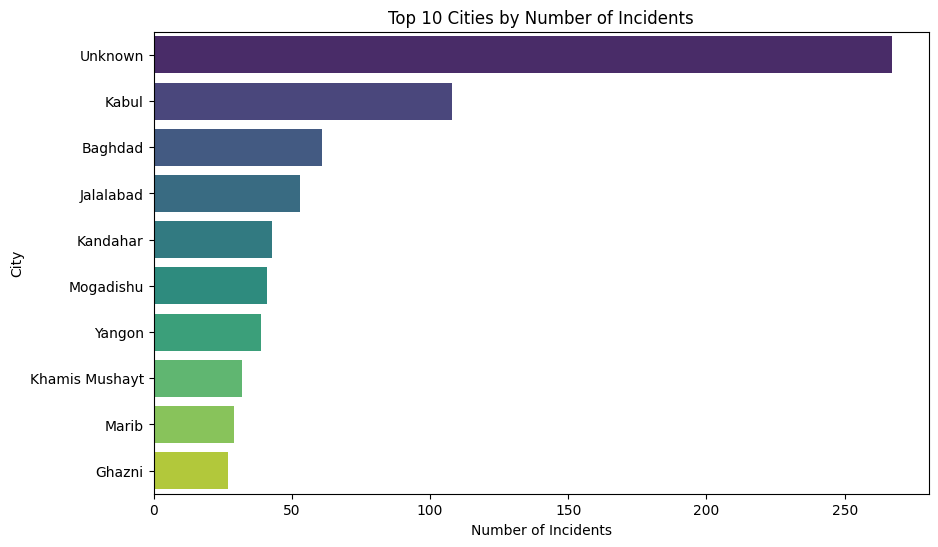

C:\Users\giank\AppData\Local\Temp\ipykernel_6592\853436554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='targtype1_mapped', data=df_final, order=df_final['targtype1_mapped'].value_counts().index, palette='viridis')


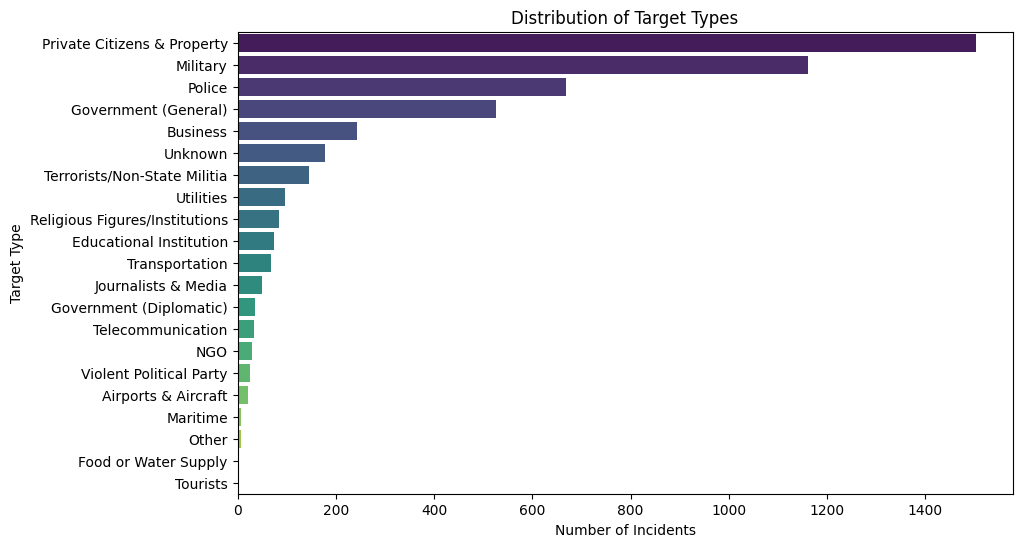

In [31]:
# Distribution of incidents by city
plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=df_final, order=df_final['city'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Cities by Number of Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('City')
plt.show()

# Distribution of target types
plt.figure(figsize=(10, 6))
sns.countplot(y='targtype1_mapped', data=df_final, order=df_final['targtype1_mapped'].value_counts().index, palette='viridis')
plt.title('Distribution of Target Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Target Type')
plt.show()

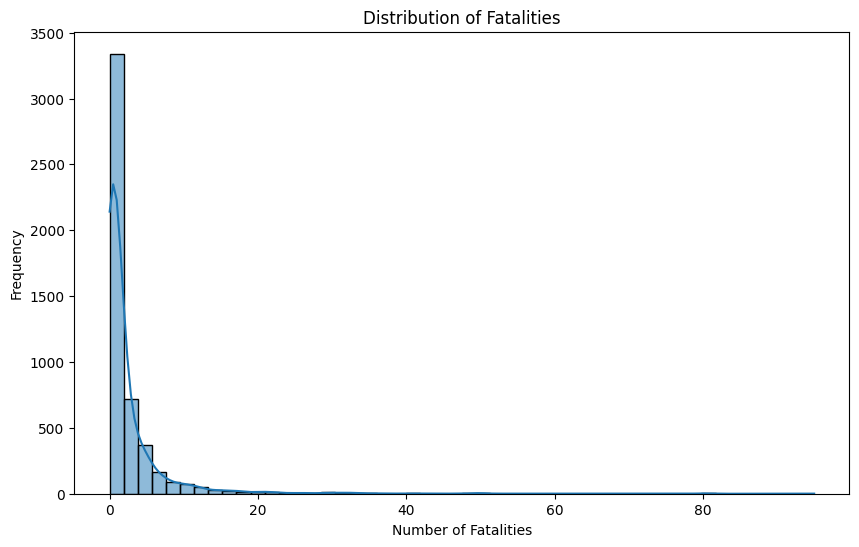

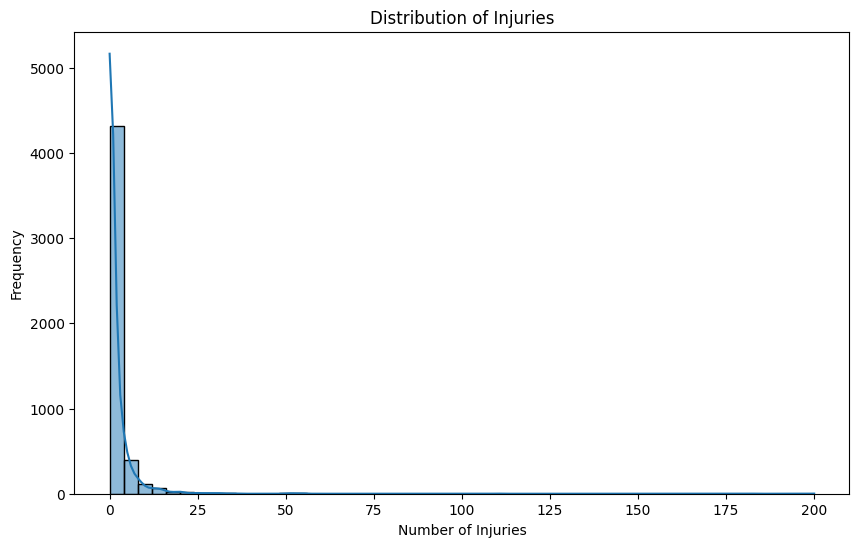

C:\Users\giank\AppData\Local\Temp\ipykernel_6592\2031145192.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='attacktype1_mapped', data=df_final, order=df_final['attacktype1_mapped'].value_counts().index, palette='viridis')


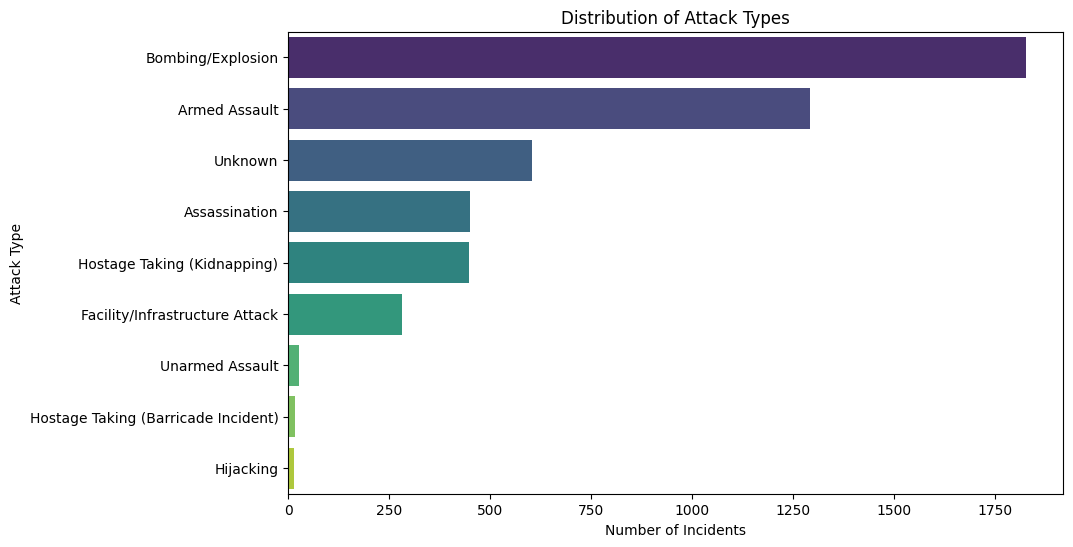

C:\Users\giank\AppData\Local\Temp\ipykernel_6592\2031145192.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attacktype1_mapped', y='nkill', data=df_final, palette='viridis')


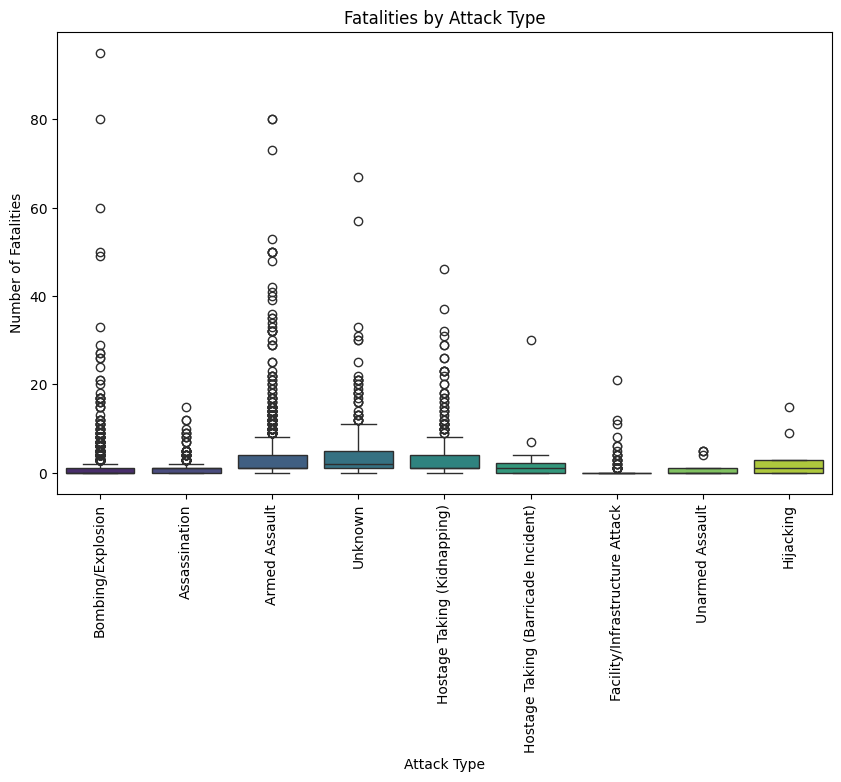

C:\Users\giank\AppData\Local\Temp\ipykernel_6592\2031145192.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attacktype1_mapped', y='nwound', data=df_final, palette='viridis')


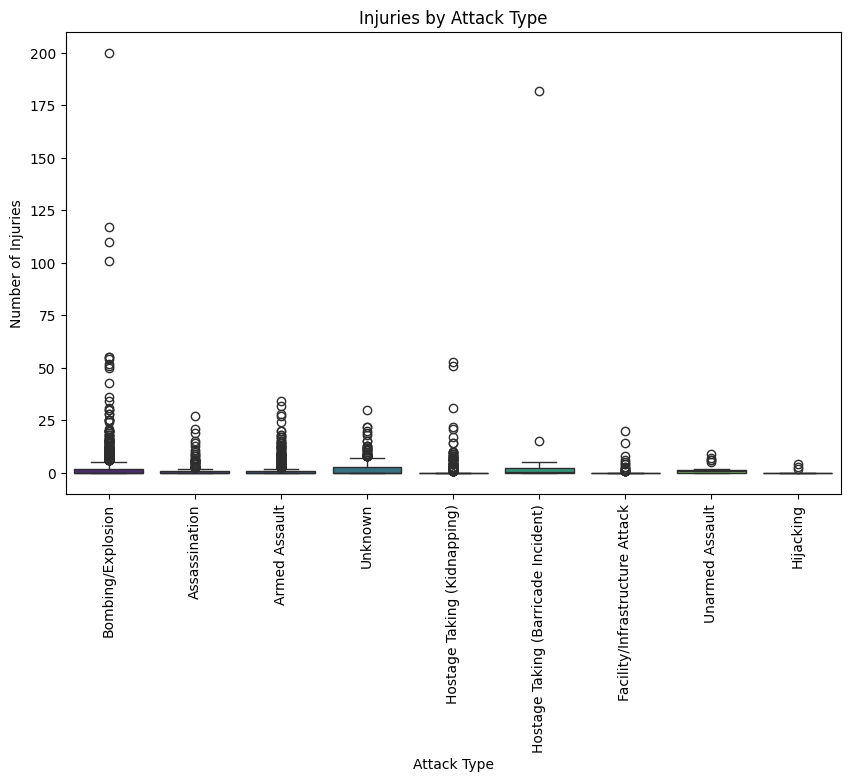

In [29]:
#Univariate Analysis
# Distribution of fatalities
plt.figure(figsize=(10, 6))
sns.histplot(df_final['nkill'], bins=50, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

# Distribution of injuries
plt.figure(figsize=(10, 6))
sns.histplot(df_final['nwound'], bins=50, kde=True)
plt.title('Distribution of Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.show()

# Distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(y='attacktype1_mapped', data=df_final, order=df_final['attacktype1_mapped'].value_counts().index, palette='viridis')
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Type')
plt.show()

# Relationship between attack type and fatalities
plt.figure(figsize=(10, 6))
sns.boxplot(x='attacktype1_mapped', y='nkill', data=df_final, palette='viridis')
plt.title('Fatalities by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=90)
plt.show()

# Relationship between attack type and injuries
plt.figure(figsize=(10, 6))
sns.boxplot(x='attacktype1_mapped', y='nwound', data=df_final, palette='viridis')
plt.title('Injuries by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=90)
plt.show()

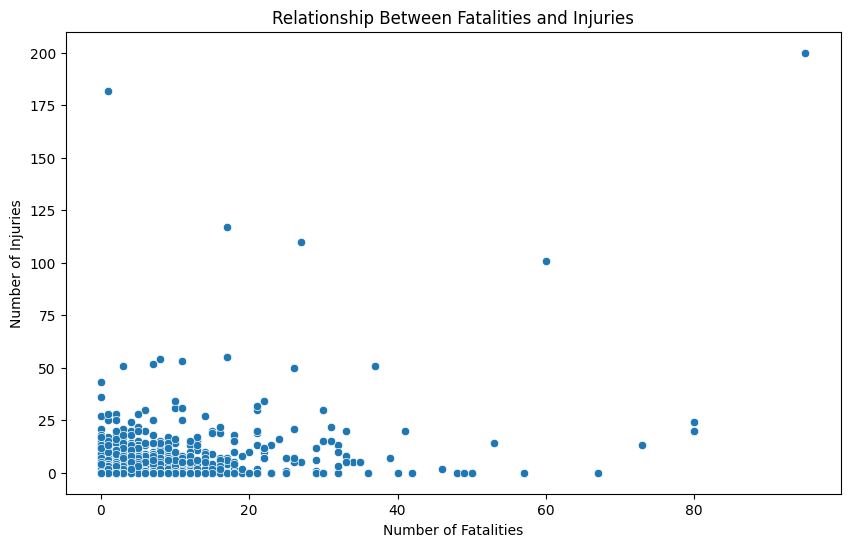

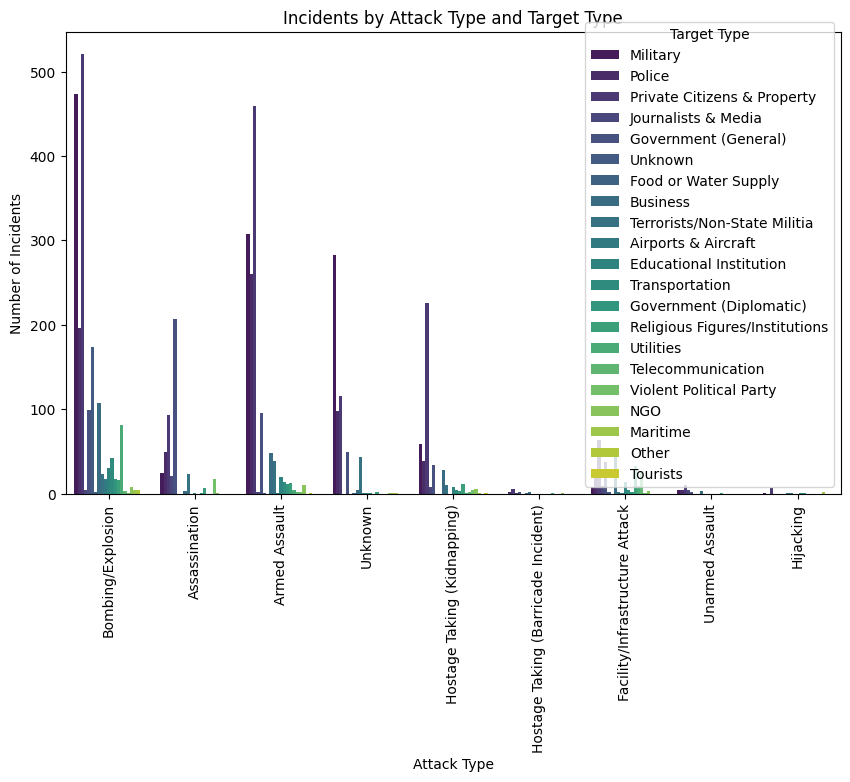

In [24]:
#Bivariate Analysis
# Relationship between fatalities and injuries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nkill', y='nwound', data=df_final)
plt.title('Relationship Between Fatalities and Injuries')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Injuries')
plt.show()

# Relationship between attack type and target type
plt.figure(figsize=(10, 6))
sns.countplot(x='attacktype1_mapped', hue='targtype1_mapped', data=df_final, palette='viridis')
plt.title('Incidents by Attack Type and Target Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.legend(title='Target Type')
plt.show()

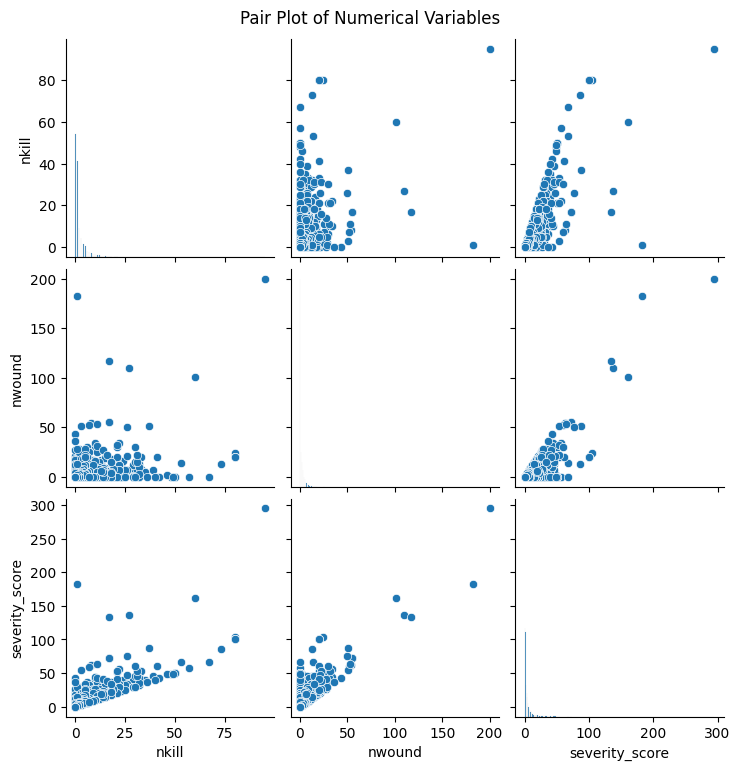

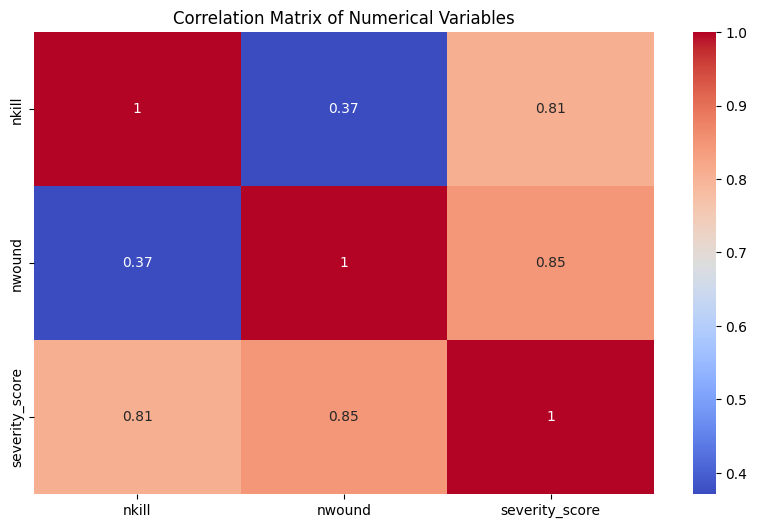

In [25]:
#Multivariate Analysis
# Pair plot for numerical variables
numerical_vars = ['nkill', 'nwound', 'severity_score']
sns.pairplot(df_final[numerical_vars])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_final[numerical_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

c:\Users\giank\OneDrive - De La Salle University - Manila\DLSU ECE OneDrive\04 2024 - 2025\01 Term 1\DATA100 [S17]\04 Resources\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\giank\OneDrive - De La Salle University - Manila\DLSU ECE OneDrive\04 2024 - 2025\01 Term 1\DATA100 [S17]\04 Resources\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\giank\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*pope

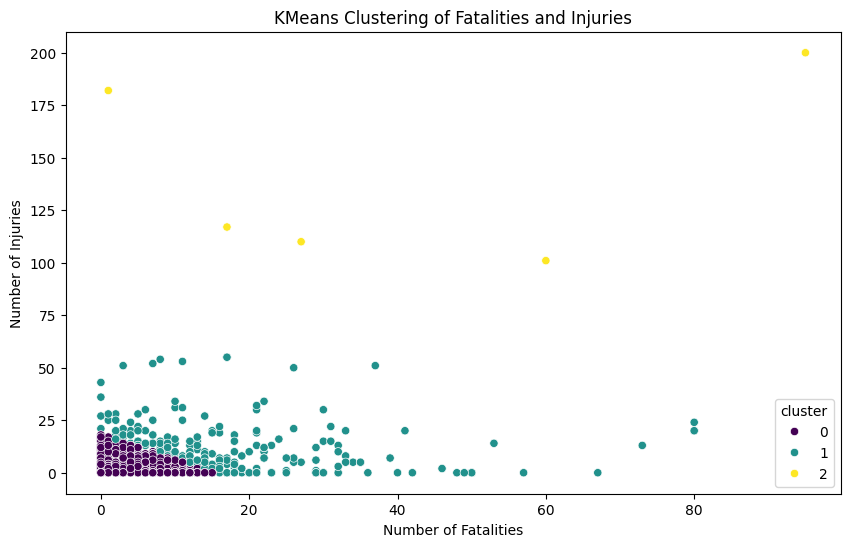

In [26]:
# KMeans clustering on numerical variables
X = df_final[numerical_vars]
kmeans = KMeans(n_clusters=3, random_state=42)
df_final['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nkill', y='nwound', hue='cluster', data=df_final, palette='viridis')
plt.title('KMeans Clustering of Fatalities and Injuries')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Injuries')
plt.show()

#### Summary and Recommendations

- summarize findings

#### Future Work

9.1) Include a Gantt chart that has a timeline of the next steps if you are given 2 to 4 months to continue this project/research.
9.2) If you did not implement machine learning technique/s, what are the candidate machine learning technique/s that you plan. Give an explanation of what are the possible benefits or improvements of these machine learning technique/s from what you have implemented in step 7 (EDA and Statistics) and details (e.g. hyperparameter tuning, different settings, and experiments).
9.3) If you were able to implement machine learning technique/s, what are other or more advanced techniques that you plan to implement? Include details (e.g. hyperparameter tuning, different settings, and experiments) and how would these other or more advanced techniques compare to the current machine learning techniques that you were able to implement.

#### References

You are encouraged to look at existing solutions online and learn from them (please cite). You also are encouraged to explore other techniques that were not discussed in class and cite all of your references.

START (National Consortium for the Study of Terrorism and Responses to Terrorism). (2022). Global Terrorism Database 1970 - 2020 [data file]. https://www.start.umd.edu/gtd

Seaborn: Statistical data visualization. (n.d.). https://seaborn.pydata.org/

Matplotlib: Python plotting. (n.d.). https://matplotlib.org/

Scikit-learn: Machine learning in Python. (n.d.). https://scikit-learn.org/stable/

Pandas: Powerful Python data analysis toolkit. (n.d.). https://pandas.pydata.org/

Geopy: Python Geocoding Toolbox. (n.d.). https://geopy.readthedocs.io/en/stable/

KMeans clustering. (n.d.). In Scikit-learn documentation. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Pair plot. (n.d.). In Seaborn documentation. https://seaborn.pydata.org/generated/seaborn.pairplot.html

Correlation matrix. (n.d.). In Seaborn documentation. https://seaborn.pydata.org/generated/seaborn.heatmap.html

Univariate analysis. (n.d.). In Statistical Methods for Research Workers by R. A. Fisher.

Bivariate analysis. (n.d.). In Applied Multivariate Statistical Analysis by Richard A. Johnson and Dean W. Wichern.

Multivariate analysis. (n.d.). In Multivariate Data Analysis by Joseph F. Hair, Jr., et al.